# Costa Rica Institute of Technology
* Course: MP-6122 Pattern Recognition
* Student: Jose Martinez Hdez
* Course: Data Science 
* Year: 2022
* Laboratory 2: Supervised Learning Models

# Dataset

For this laboratory, we will be using the dataset from https://www.kaggle.com/aakash50897/churn-modellingcsv that describes the customers of a bank.

## Features

- *RowNumber*: The row number of the dataset.
- *CustomerId*: The customer id.
- *Surname*: The customer surname.
- *CreditScore*: The customer credit score.
- *Geography*: The customer geography.
- *Gender*: The customer gender.
- *Age*: The customer age.
- *Tenure*: The customer tenure.
- *Balance*: The customer balance.
- *NumOfProducts*: The customer number of products.
- *HasCrCard*: The customer has credit card.
- *IsActiveMember*: The customer is active member.
- *EstimatedSalary*: The customer estimated salary.

## Target

- *Exited*: The customer exited the bank.  

# Preprocessing

In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive, data_table

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#data_table.enable_dataframe_formatter()
#drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/MP6122/dataset/churn_modelling.csv"
path = "dataset/churn_modelling.csv"

In [7]:
# Read the data
df=pd.read_csv(path)

# Table to handle data
# data_table.DataTable(df.head(df.shape[0]), include_index=False, num_rows_per_page=10)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## Check invalid and duplicated values

print(df.shape)
print(df.isnull().sum().any())
print(df.duplicated().sum())

(10000, 14)
False
0


In [9]:
## Describe the data 

df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


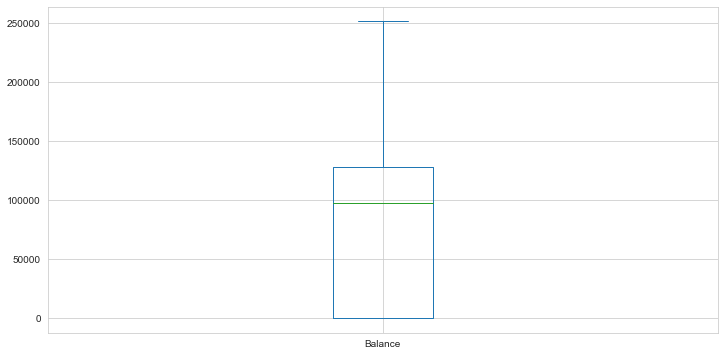

In [10]:
# Balance plot
df.Balance.plot(kind="box")

# Drop some columns 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


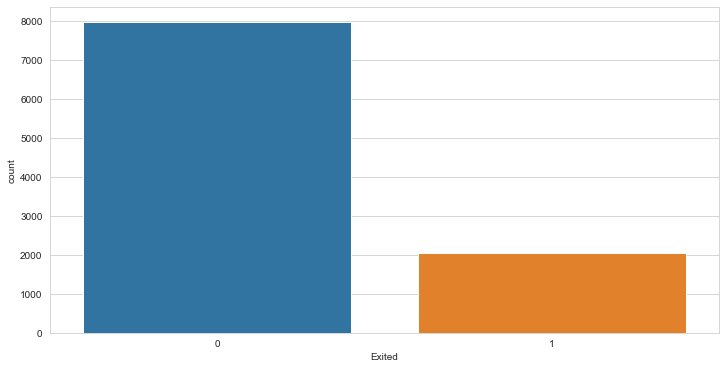

In [11]:
# Check data balancing
print(df.Exited.value_counts())
sns.countplot(df["Exited"]); 

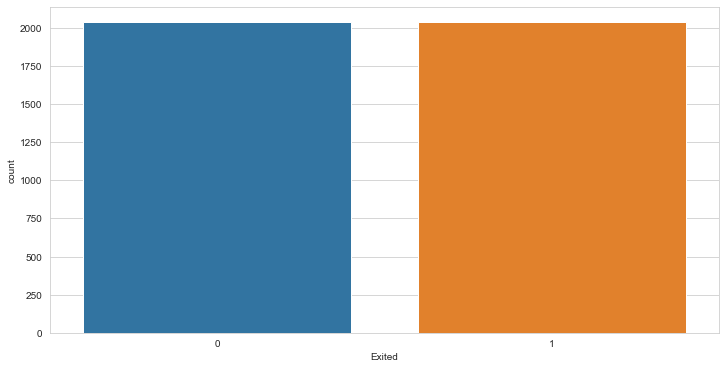

In [12]:
# Downsampling

class1, class2 = df.Exited.value_counts()

c2 = df[df['Exited'] == 1]
c1 = df[df['Exited'] == 0]

df_2 = c1.sample(class2, replace=True)

df_down = pd.concat([c2, df_2], axis=0)
sns.countplot(df_down["Exited"]);

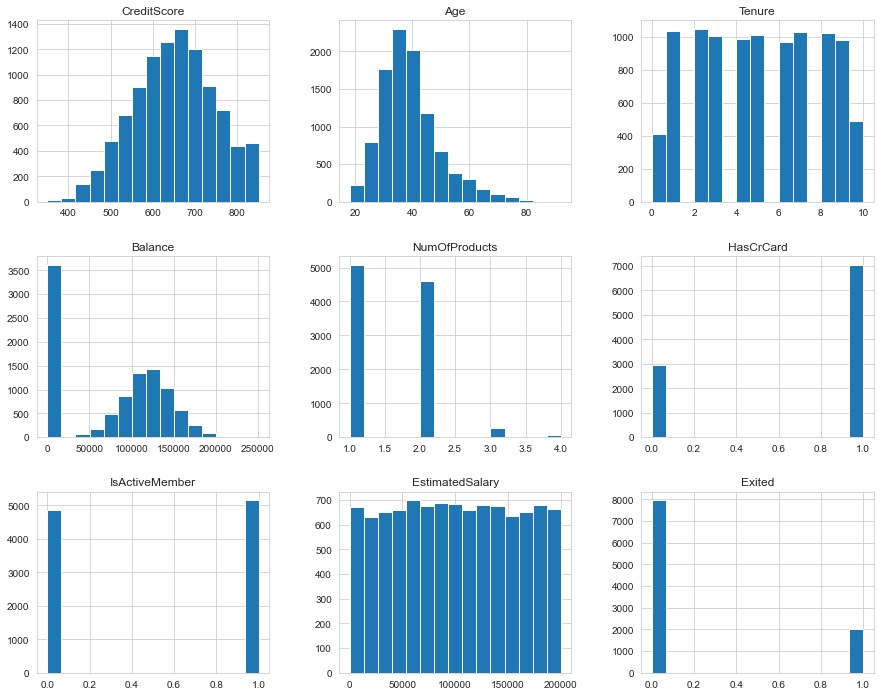

In [13]:
# Plot histogram

df.hist(figsize=(15, 12), bins=15);

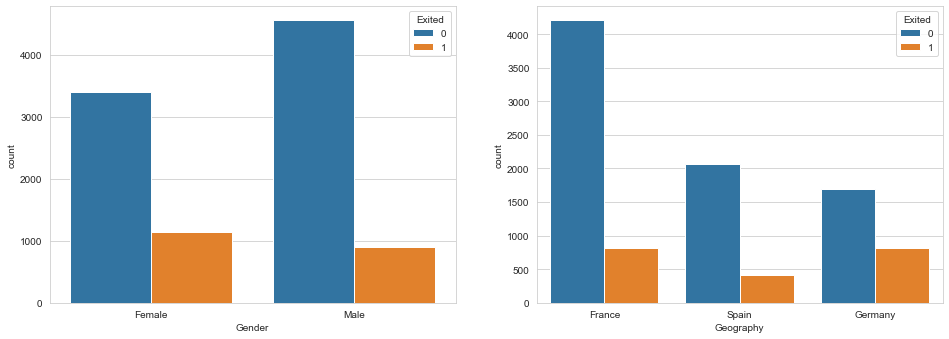

In [14]:
# Categorical data

cat_list = ["Gender", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

In [15]:

# One hot enconding 
df = pd.get_dummies(df)
# data_table.DataTable(df.head(df.shape[0]), include_index=False, num_rows_per_page=10)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<AxesSubplot:>

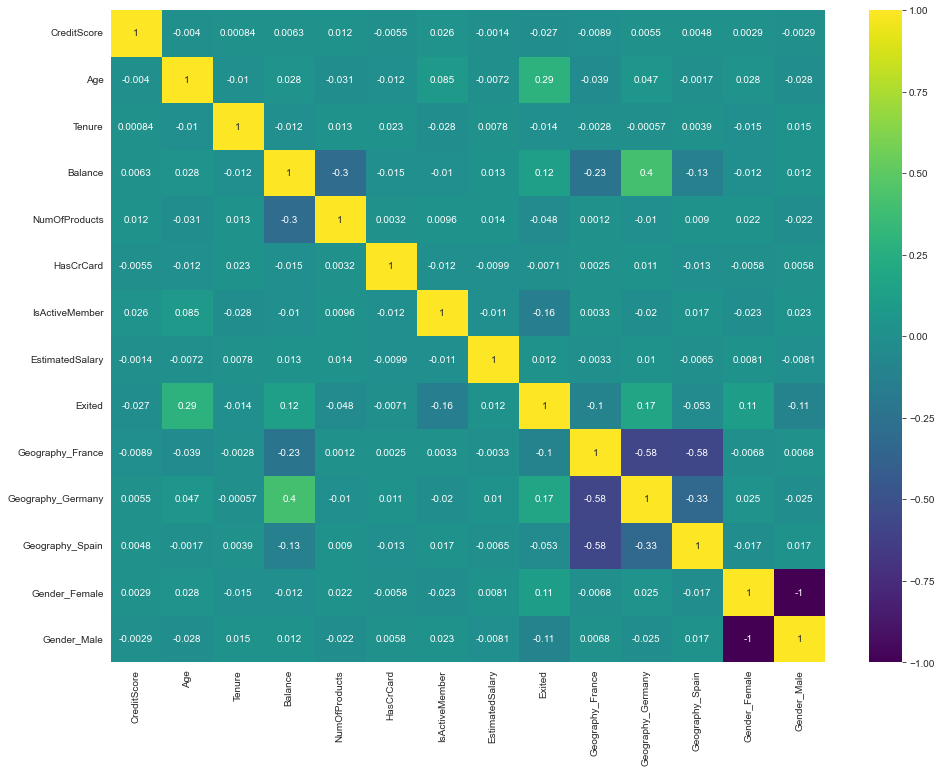

In [16]:
# Correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

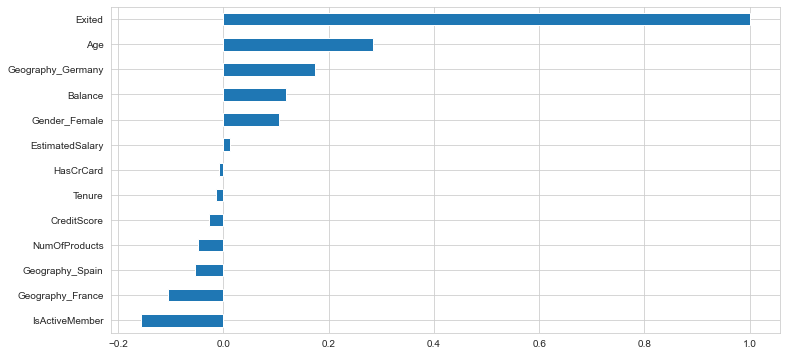

In [17]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

# Benchmarking Analysis

## Model 1: Linear Regression

## Model 2: Decision Tree

## Model 3: Naive Bayes

## Model 4: SVM

## Model 5: Linear Regression

## Model 6: Linear Regression

# Metrics

# Model's Comparison